In [1]:
# imports used throughout this notebook
from pyspark.sql import DataFrame, Column, Window
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

DEBUGGING = False

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/14 02:59:01 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.26.235.73 instead (on interface eth0)
22/08/14 02:59:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/14 02:59:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/08/14 02:59:03 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.


In [3]:
# read in the aggregated covid data
flu_df = spark.read.parquet('../data/curated/virals/flu/cases-by-week/')
flu_df.limit(5)

AnalysisException: Path does not exist: file:/mnt/c/Users/Xavier Travers/Desktop/Uni/ADS/mast30034-project-1-DigitalData/data/curated/virals/flu/cases-by-week

In [ ]:
flu_df = flu_df.groupBy('week_index', 'borough')\
    .agg(
        F.sum('cases').alias('tot_cases')
    )

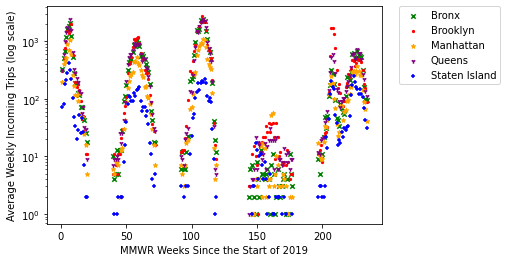

In [ ]:
# plot a time-series histogram to show how average weekly trips changes per week
ph.group_plot(flu_df.toPandas(), 'week_index', 'tot_cases',
    'borough', filename_prefix = 'flu', kind = 'scatter',
    xlabel = 'MMWR Weeks Since the Start of 2019', 
    ylabel = 'Average Weekly Incoming Trips', logy=True)